##library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

## eksplorasi & visualisasi

In [ ]:
url = "https://drive.google.com/uc?id=1tHVr4CLC-gk6SBodROXrNSWl_QgfSmTf"
df = pd.read_csv(url)
df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


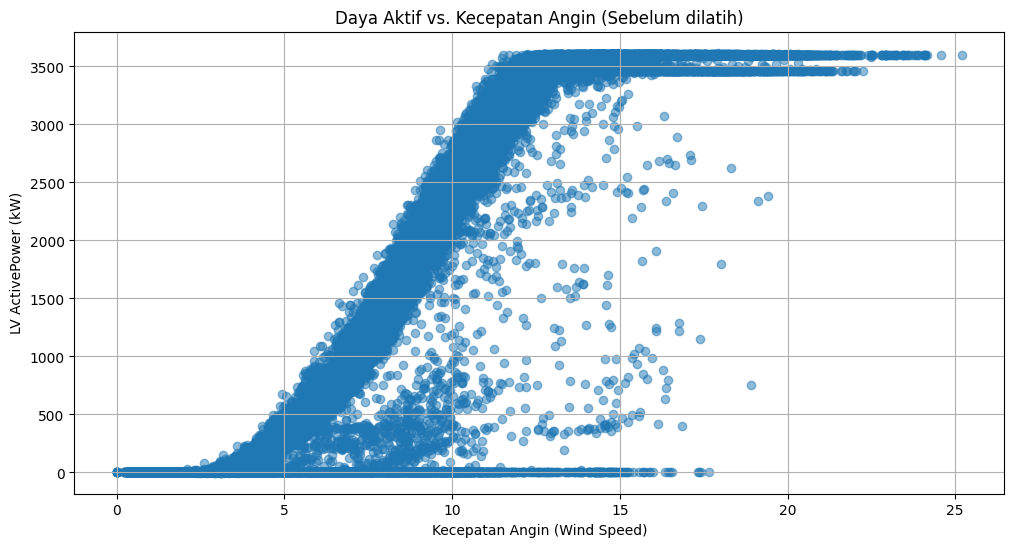

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(df["Wind Speed (m/s)"], df["LV ActivePower (kW)"], alpha=0.5)
plt.xlabel('Kecepatan Angin (Wind Speed)')
plt.ylabel('LV ActivePower (kW)')
plt.title('Daya Aktif vs. Kecepatan Angin (Sebelum dilatih)')
plt.grid(True)
plt.show()


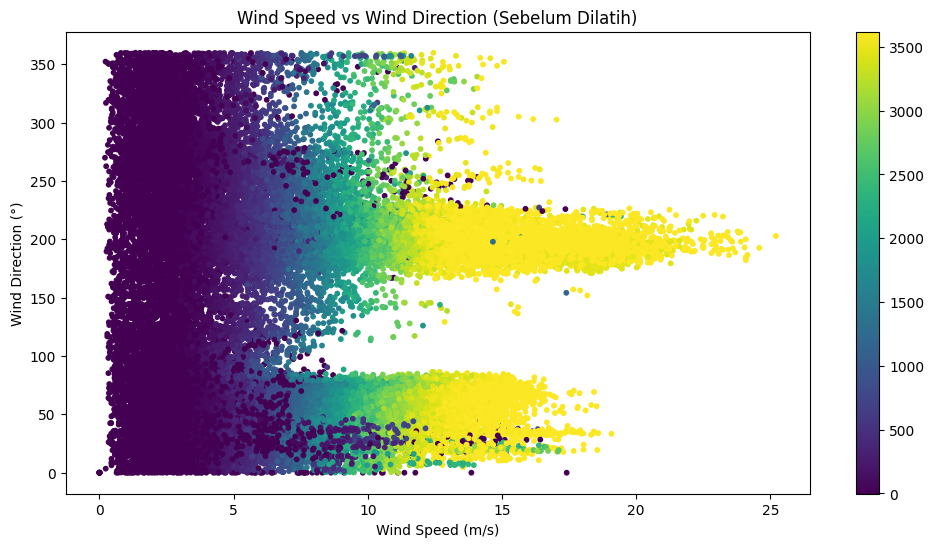

In [ ]:
# Plot data sebelum dilatih
plt.figure(figsize=(12, 6))
plt.scatter(df['Wind Speed (m/s)'], df['Wind Direction (°)'], c=df['LV ActivePower (kW)'], s=10)
plt.title('Wind Speed vs Wind Direction (Sebelum Dilatih)')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Wind Direction (°)')
plt.colorbar()

In [ ]:
# Memilih fitur dan target
features = ["Wind Speed (m/s)", "Wind Direction (°)"]
target = ["LV ActivePower (kW)"]
X = df[features].values
y = df[target].values


In [ ]:
# Normalisasi data
scaler_x = StandardScaler()
scaler_y = StandardScaler()
scaler_x.fit(X)
scaler_y.fit(y)
X = scaler_x.transform(X)
y = scaler_y.transform(y)

In [ ]:
# KFold cross validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
mse_scores = []

In [ ]:
# Data setelah dilatih
df_after = df.copy()
# Tambahkan data dari dataset lain
df_after = pd.concat([df_after, pd.read_csv("https://drive.google.com/uc?id=19gfneVlgVQK3kFihdlHjCMo1mmvZuYRl&export")])
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Reshape input data to have three dimensions
    X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
    X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

##modeling

In [ ]:
# Membangun model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(100, activation='relu'))
model.add(Dropout(0.2))  # Tambahkan dropout layer
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
 # Melatih model
 model.fit(X_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
632/632 [==============================] - 7s 7ms/step - loss: 0.1502
Epoch 2/50
632/632 [==============================] - 6s 10ms/step - loss: 0.0952
Epoch 3/50
632/632 [==============================] - 6s 9ms/step - loss: 0.0935
Epoch 4/50
632/632 [==============================] - 10s 15ms/step - loss: 0.0927
Epoch 5/50
632/632 [==============================] - 8s 13ms/step - loss: 0.0917
Epoch 6/50
632/632 [==============================] - 7s 10ms/step - loss: 0.0909
Epoch 7/50
632/632 [==============================] - 4s 7ms/step - loss: 0.0908
Epoch 8/50
632/632 [==============================] - 4s 7ms/step - loss: 0.0902
Epoch 9/50
632/632 [==============================] - 6s 10ms/step - loss: 0.0900
Epoch 10/50
632/632 [==============================] - 4s 7ms/step - loss: 0.0898
Epoch 11/50
632/632 [==============================] - 4s 7ms/step - loss: 0.0897
Epoch 12/50
632/632 [==============================] - 6s 10ms/step - loss: 0.0892
Epoch 13/50
632/63

In [ ]:
# Evaluasi model
mse_score = model.evaluate(X_test, y_test)
mse_scores.append(mse_score)

316/316 [==============================] - 1s 3ms/step - loss: 0.0879


In [ ]:
# Bentuk ulang data masukan menjadi tiga dimensi
df_after_transformed = scaler_x.transform(df_after[features])
df_after_transformed = df_after_transformed.reshape(df_after_transformed.shape[0], 1, df_after_transformed.shape[1])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
# Prediksi pada data setelah dilatih
df_after['LV ActivePower (kW)'] = model.predict(df_after_transformed)

# Mean Squared Error (MSE) rata-rata
mse_mean = np.mean(mse_scores)
print(f"Mean Squared Error (MSE) rata-rata: {mse_mean}")

1853/1853 [==============================] - 6s 3ms/step
Mean Squared Error (MSE) rata-rata: 0.0878559798002243


In [ ]:
# Evaluasi model pada data pelatihan
loss_train = model.evaluate(X_train, y_train)
print(f"Mean Squared Error (MSE) pada data pelatihan: {loss_train}")

1264/1264 [==============================] - 3s 2ms/step - loss: 0.0916
Mean Squared Error (MSE) pada data pelatihan: 0.09163226932287216


In [ ]:
# Evaluasi model pada data pengujian
loss_test = model.evaluate(X_test, y_test)
print(f"Mean Squared Error (MSE) pada data pengujian: {loss_test}")

316/316 [==============================] - 1s 2ms/step - loss: 0.0879
Mean Squared Error (MSE) pada data pengujian: 0.0878559798002243


##prediksi

In [ ]:
# Input dari pengguna
wind_speed = float(input('Masukkan kecepatan angin (m/s): '))
wind_direction = float(input('Masukkan arah angin (°): '))
input_array = np.array([[wind_speed, wind_direction]])
input_array = scaler_x.transform(input_array)
input_array = input_array.reshape((1, input_array.shape[0], input_array.shape[1]))
# Prediksi
predictions = model.predict(input_array)
predictions_denorm = scaler_y.inverse_transform(predictions)
print(f"Prediksi LV ActivePower (kW): {predictions_denorm[0][0]}")

Masukkan kecepatan angin (m/s): 7
Masukkan arah angin (°): 130
1/1 [==============================] - 0s 21ms/step
Prediksi LV ActivePower (kW): 965.1663818359375


  50/1853 [..............................] - ETA: 3s

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


1853/1853 [==============================] - 4s 2ms/step
Mean Squared Error (MSE) rata-rata: 0.0878559798002243


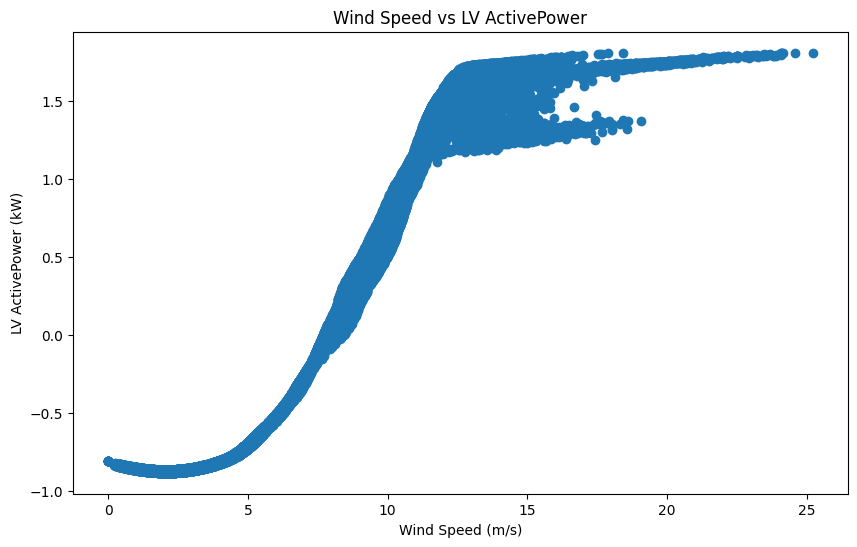

In [ ]:
# Reshape input data to have three dimensions
df_after_transformed = scaler_x.transform(df_after[features])
df_after_transformed = df_after_transformed.reshape(df_after_transformed.shape[0], 1, df_after_transformed.shape[1])
df_after['LV ActivePower (kW)'] = model.predict(df_after_transformed)
mse_mean = np.mean(mse_scores)
print(f"Mean Squared Error (MSE) rata-rata: {mse_mean}")

# Membuat grafik wind speed vs lv active power
plt.figure(figsize=(10, 6))
plt.scatter(df_after['Wind Speed (m/s)'], df_after['LV ActivePower (kW)'])
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('LV ActivePower (kW)')
plt.title('Wind Speed vs LV ActivePower')
plt.show()

  52/1853 [..............................] - ETA: 3s

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


1853/1853 [==============================] - 4s 2ms/step
Mean Squared Error (MSE) rata-rata: 0.0878559798002243


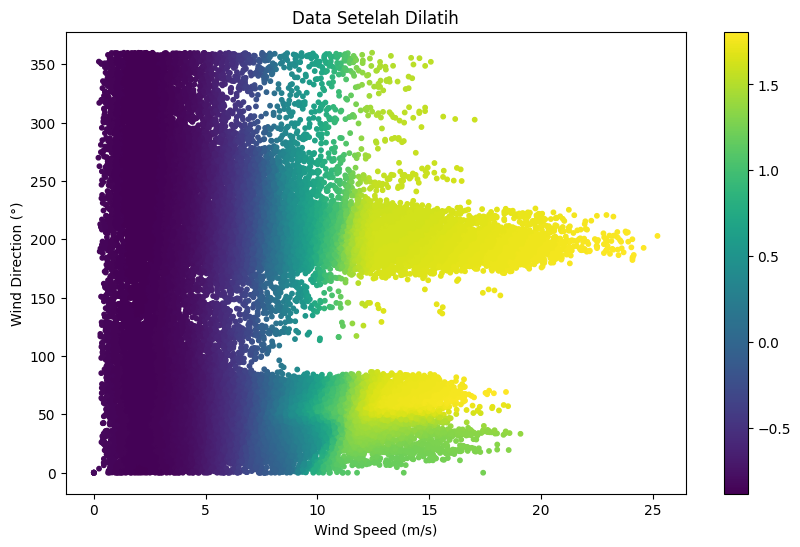

In [ ]:
# Plot data setelah dilatih
df_after_transformed = scaler_x.transform(df_after[features])
df_after_transformed = df_after_transformed.reshape(df_after_transformed.shape[0], 1, df_after_transformed.shape[1])
df_after['LV ActivePower (kW)'] = model.predict(df_after_transformed)
mse_mean = np.mean(mse_scores)
print(f"Mean Squared Error (MSE) rata-rata: {mse_mean}")

plt.figure(figsize=(10, 6))
plt.scatter(df_after['Wind Speed (m/s)'], df_after['Wind Direction (°)'], c=df_after['LV ActivePower (kW)'], s=10)
plt.title('Data Setelah Dilatih')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Wind Direction (°)')
plt.colorbar()

plt.show()